Van Tassel, Peter, (2018), Relative pricing and risk premia in equity volatility markets, No 867, Staff Reports, Federal Reserve Bank of New York, https://EconPapers.repec.org/RePEc:fip:fednsr:867

The author investigates the relationship between VIX futures, variance swaps and S&P500 option prices. He builds synthetic variance swap rates using the logarithm of realized variance and S&P option prices. He then uses these to price VIX futures. He then uses this model and the mispricing to forecast VIX returns.


In [17]:
from pathlib import Path   
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import pyfolio as pf
import quandl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.transforms as bbox


import sys
import socket
opt_path = '/Users/ebellord/PycharmProjects/opt_trade'
if  opt_path not in sys.path:
    sys.path.append(opt_path)

if socket.gethostname() == 'edmunds-mbp.lan':
    %config InlineBackend.figure_format = 'retina'

from spx_data_update import quandle_api
from option_utilities import perf_stats
quandl.ApiConfig.api_key = quandle_api()
sp500_raw, vix_raw = [web.get_data_yahoo(item, 'JAN-01-90') for item in ['^GSPC', '^VIX']]

In [18]:
font_size = 9
fig_path = Path.home() / 'Dropbox' / 'outputDev' / 'fig'
rcParams['font.sans-serif'] = 'Roboto Condensed'
rcParams['font.family'] = "sans-serif"
bb = bbox.Bbox([[0.25, 0.25], [7.46, 4.2]])

text_color_light = '#3f5378'
text_color_dark = '#263248'
text_color_yellow = '#ff9800'
def color_axis(ax, txt_color):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_color(txt_color)
        
def invisible_spines(ax):        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
#     new_cmap = colors.LinearSegmentedColormap.from_list(
#         'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
#         cmap(np.linspace(minval, maxval, n)))
#     return new_cmap   


def grid_xticks_format(ax_list):
    _ = [ax.grid(color='grey', 
                 linestyle=':', 
                 linewidth=1, 
                 alpha=0.5) for ax in ax_list]

    _ = [ax.tick_params(
        axis='both',          # changes apply to the both axis 'x', 'y'
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,
        left=False) for ax in ax_list]
    return ax_list

In [19]:
contract_month = range(1, 10)
vix_list = []
for month in contract_month:
    vix_fut = quandl.get('CHRIS/CBOE_VX{}'.format(month),  collapse='daily')
    vix_fut = vix_fut['Close']
    vix_fut[:'2007-03-23'] = vix_fut[:'2007-03-23'] / 10
    print('Month {0} Contracts replaced {1}'.format(month, sum(vix_fut == 0)))
    vix_fut = vix_fut.replace(to_replace=0, method='ffill')
    vix_fut = vix_fut.rename('Month{}'.format(month))
    vix_list.append(vix_fut)

Month 1 Contracts replaced 4
Month 2 Contracts replaced 4
Month 3 Contracts replaced 0
Month 4 Contracts replaced 0
Month 5 Contracts replaced 0
Month 6 Contracts replaced 0
Month 7 Contracts replaced 0
Month 8 Contracts replaced 0
Month 9 Contracts replaced 57


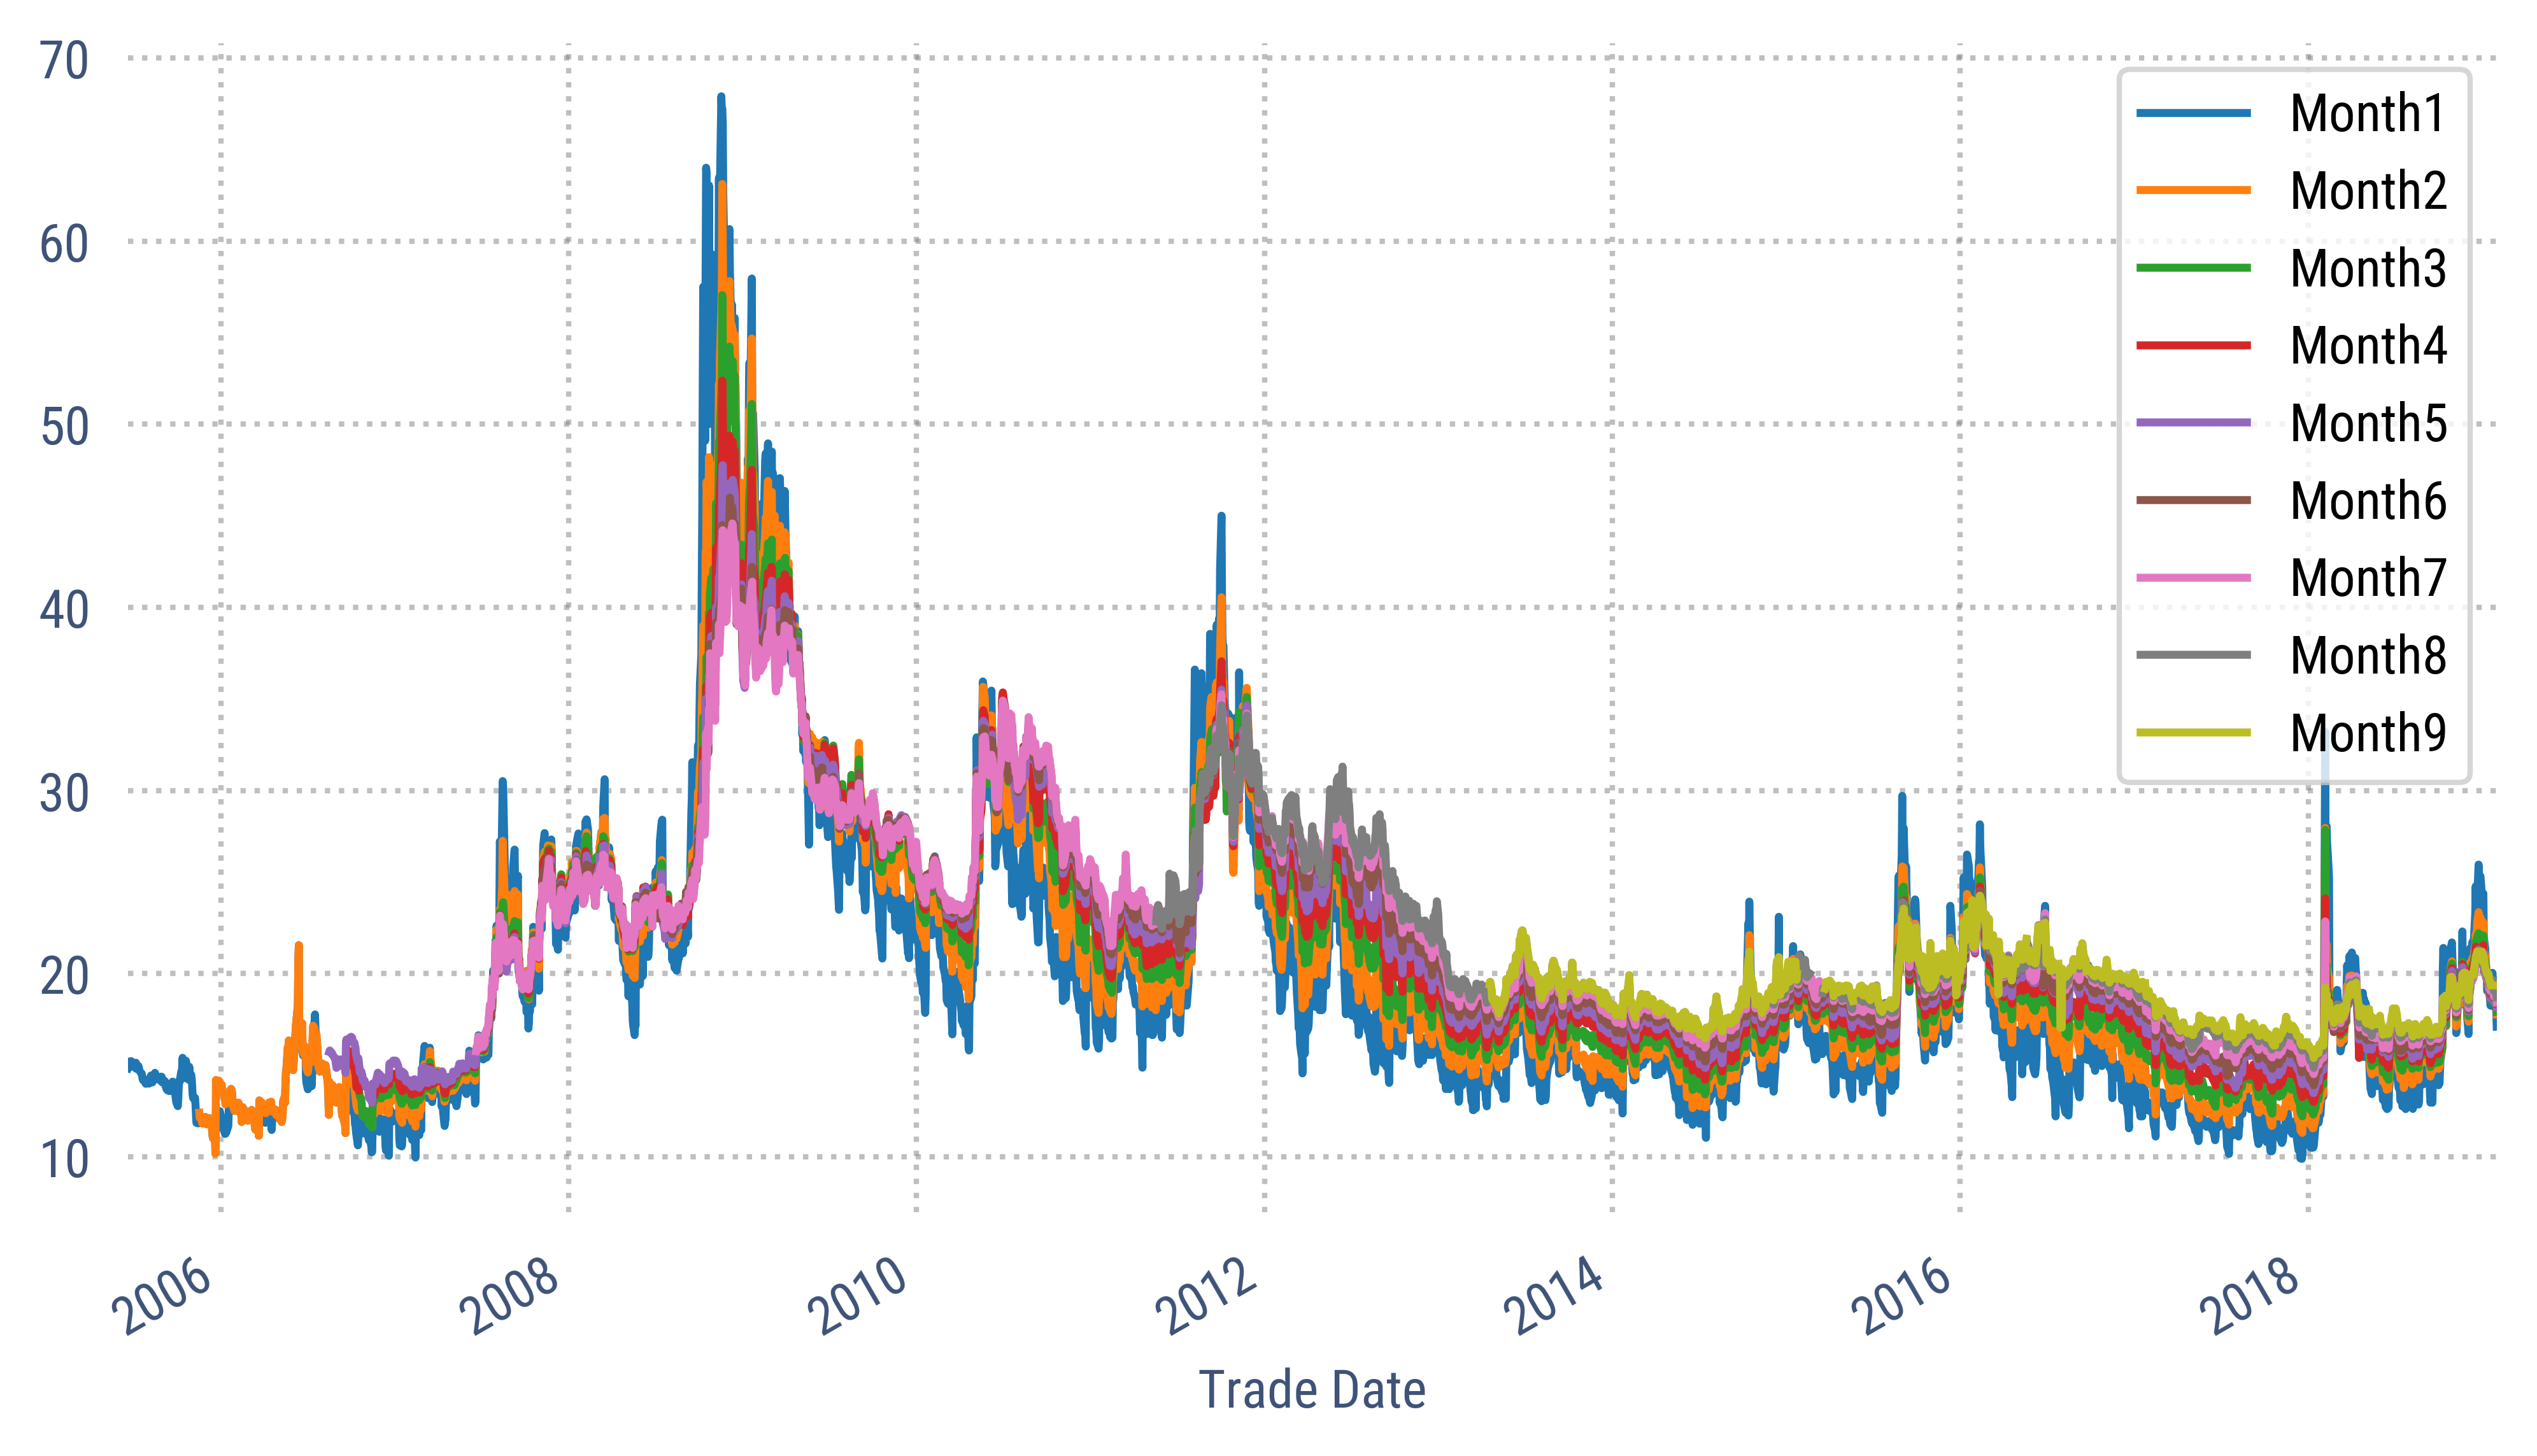

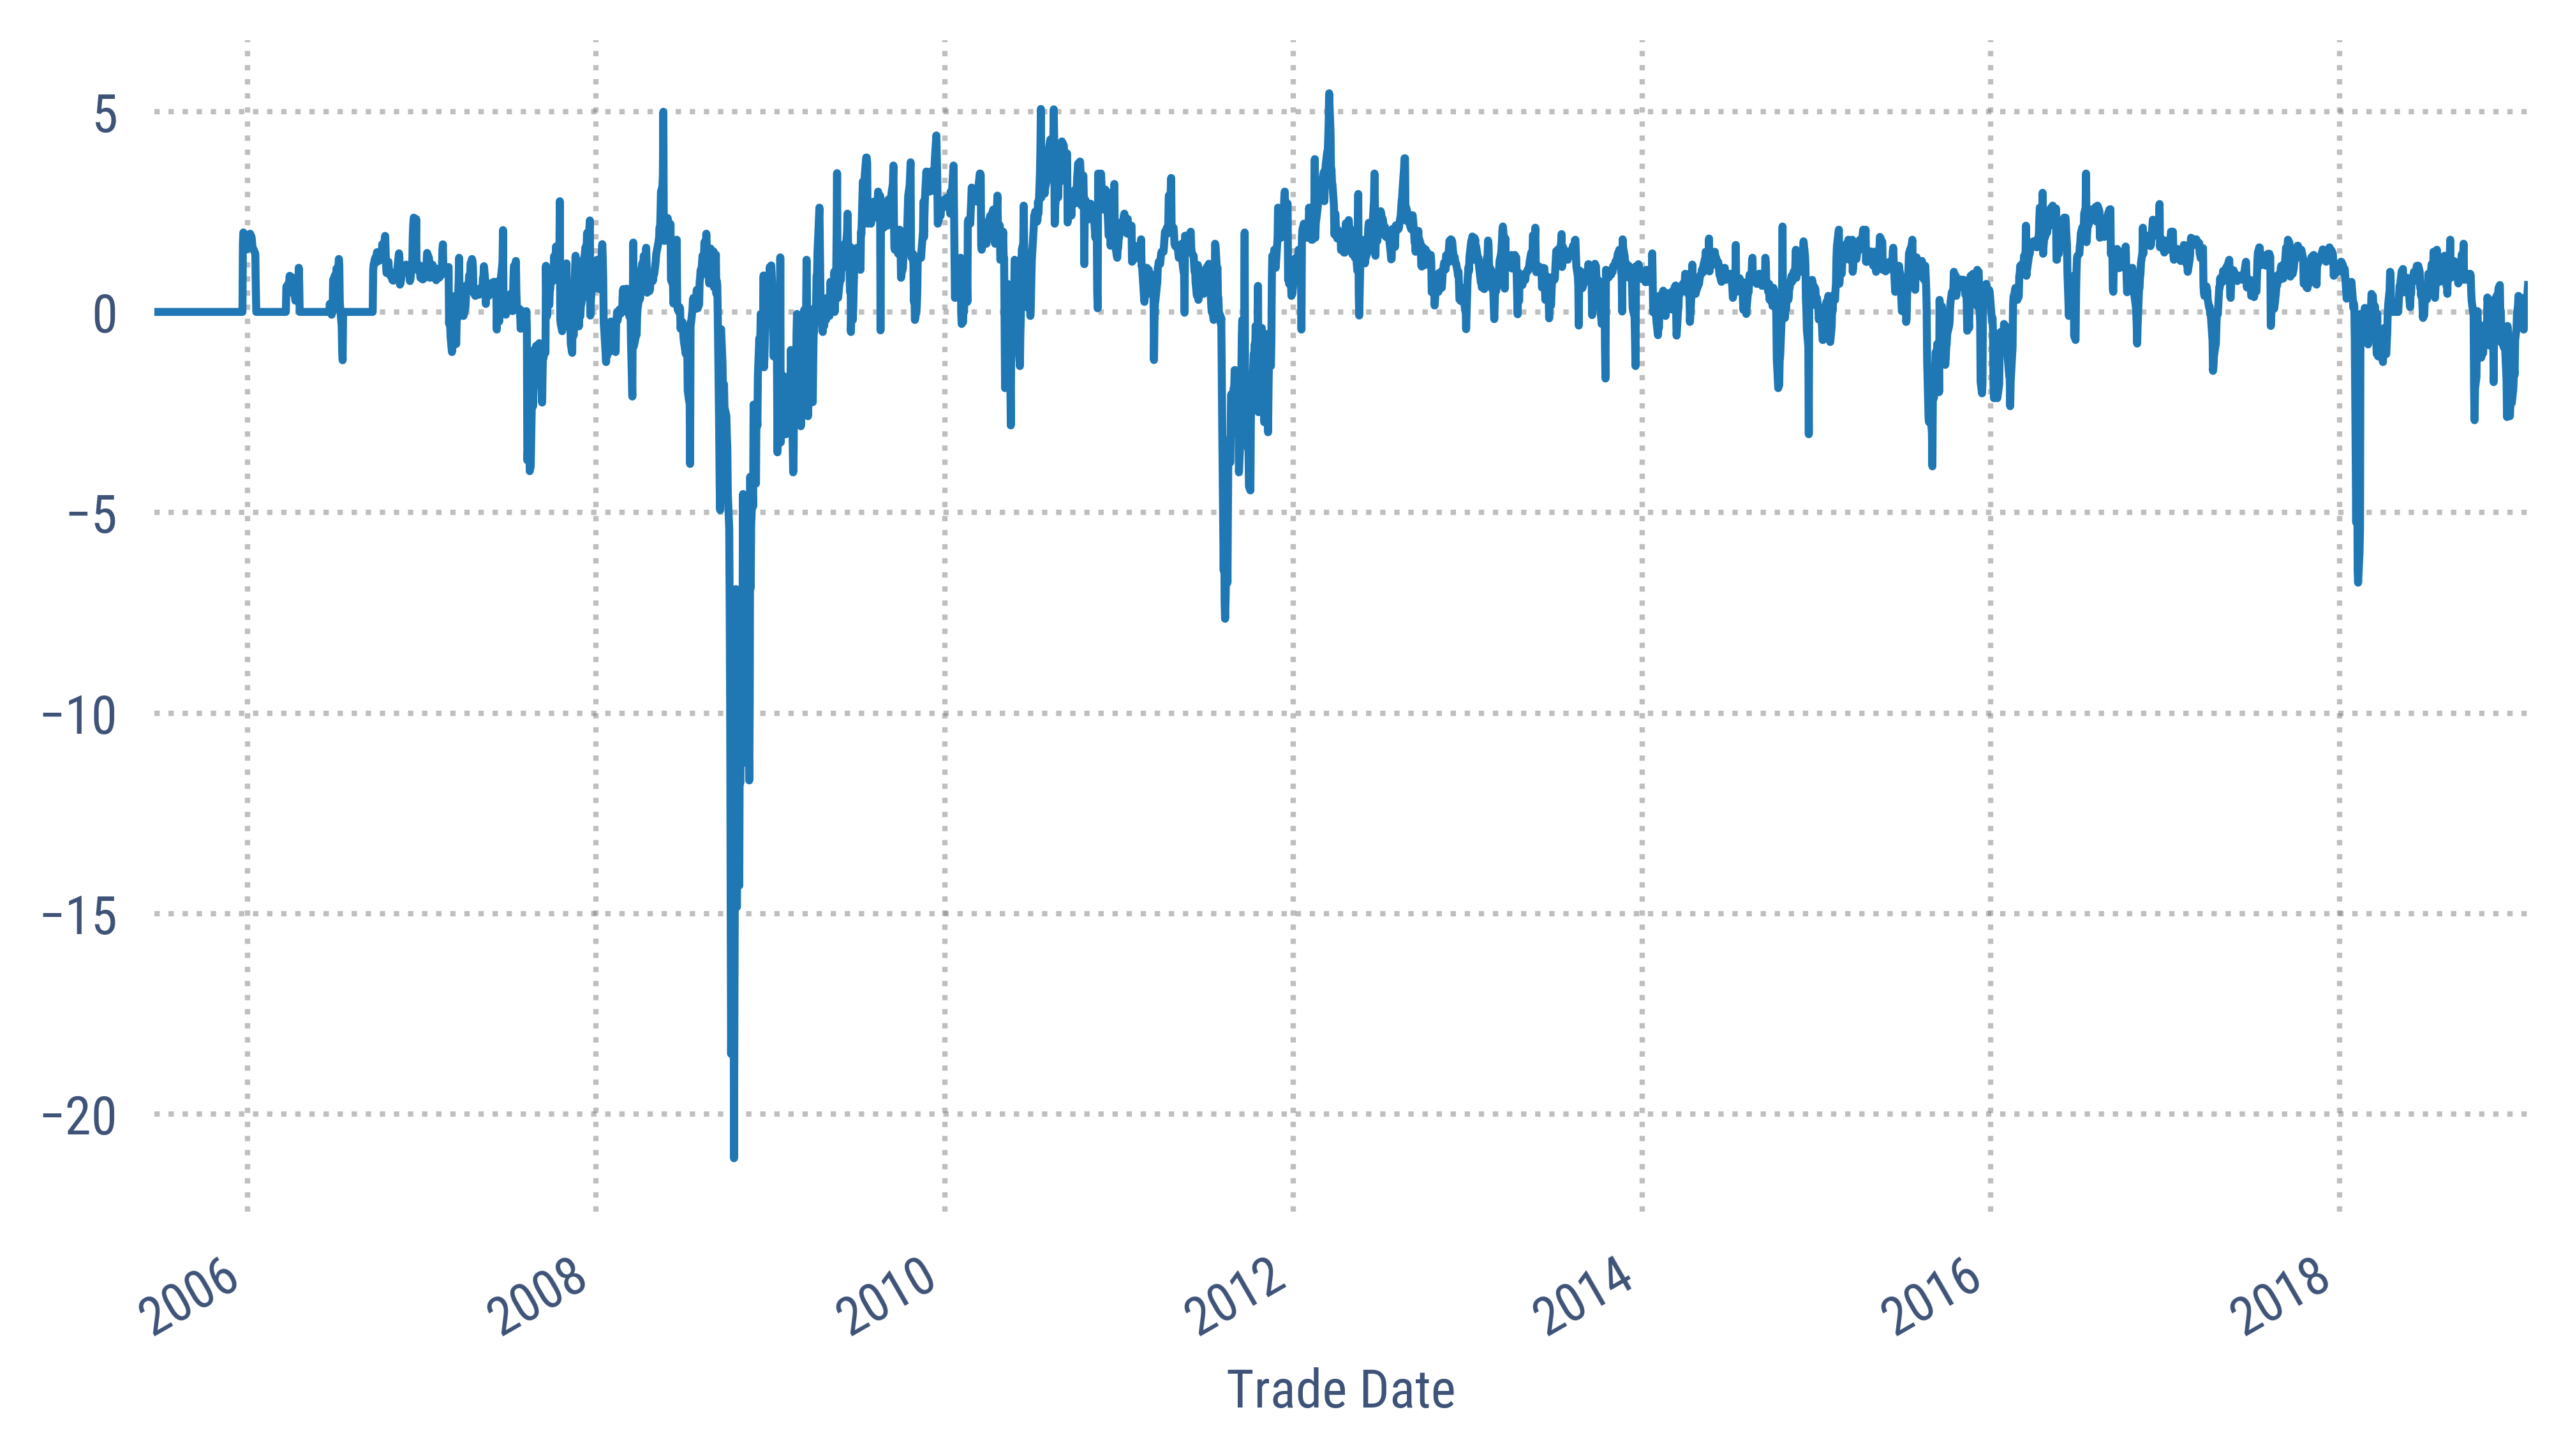

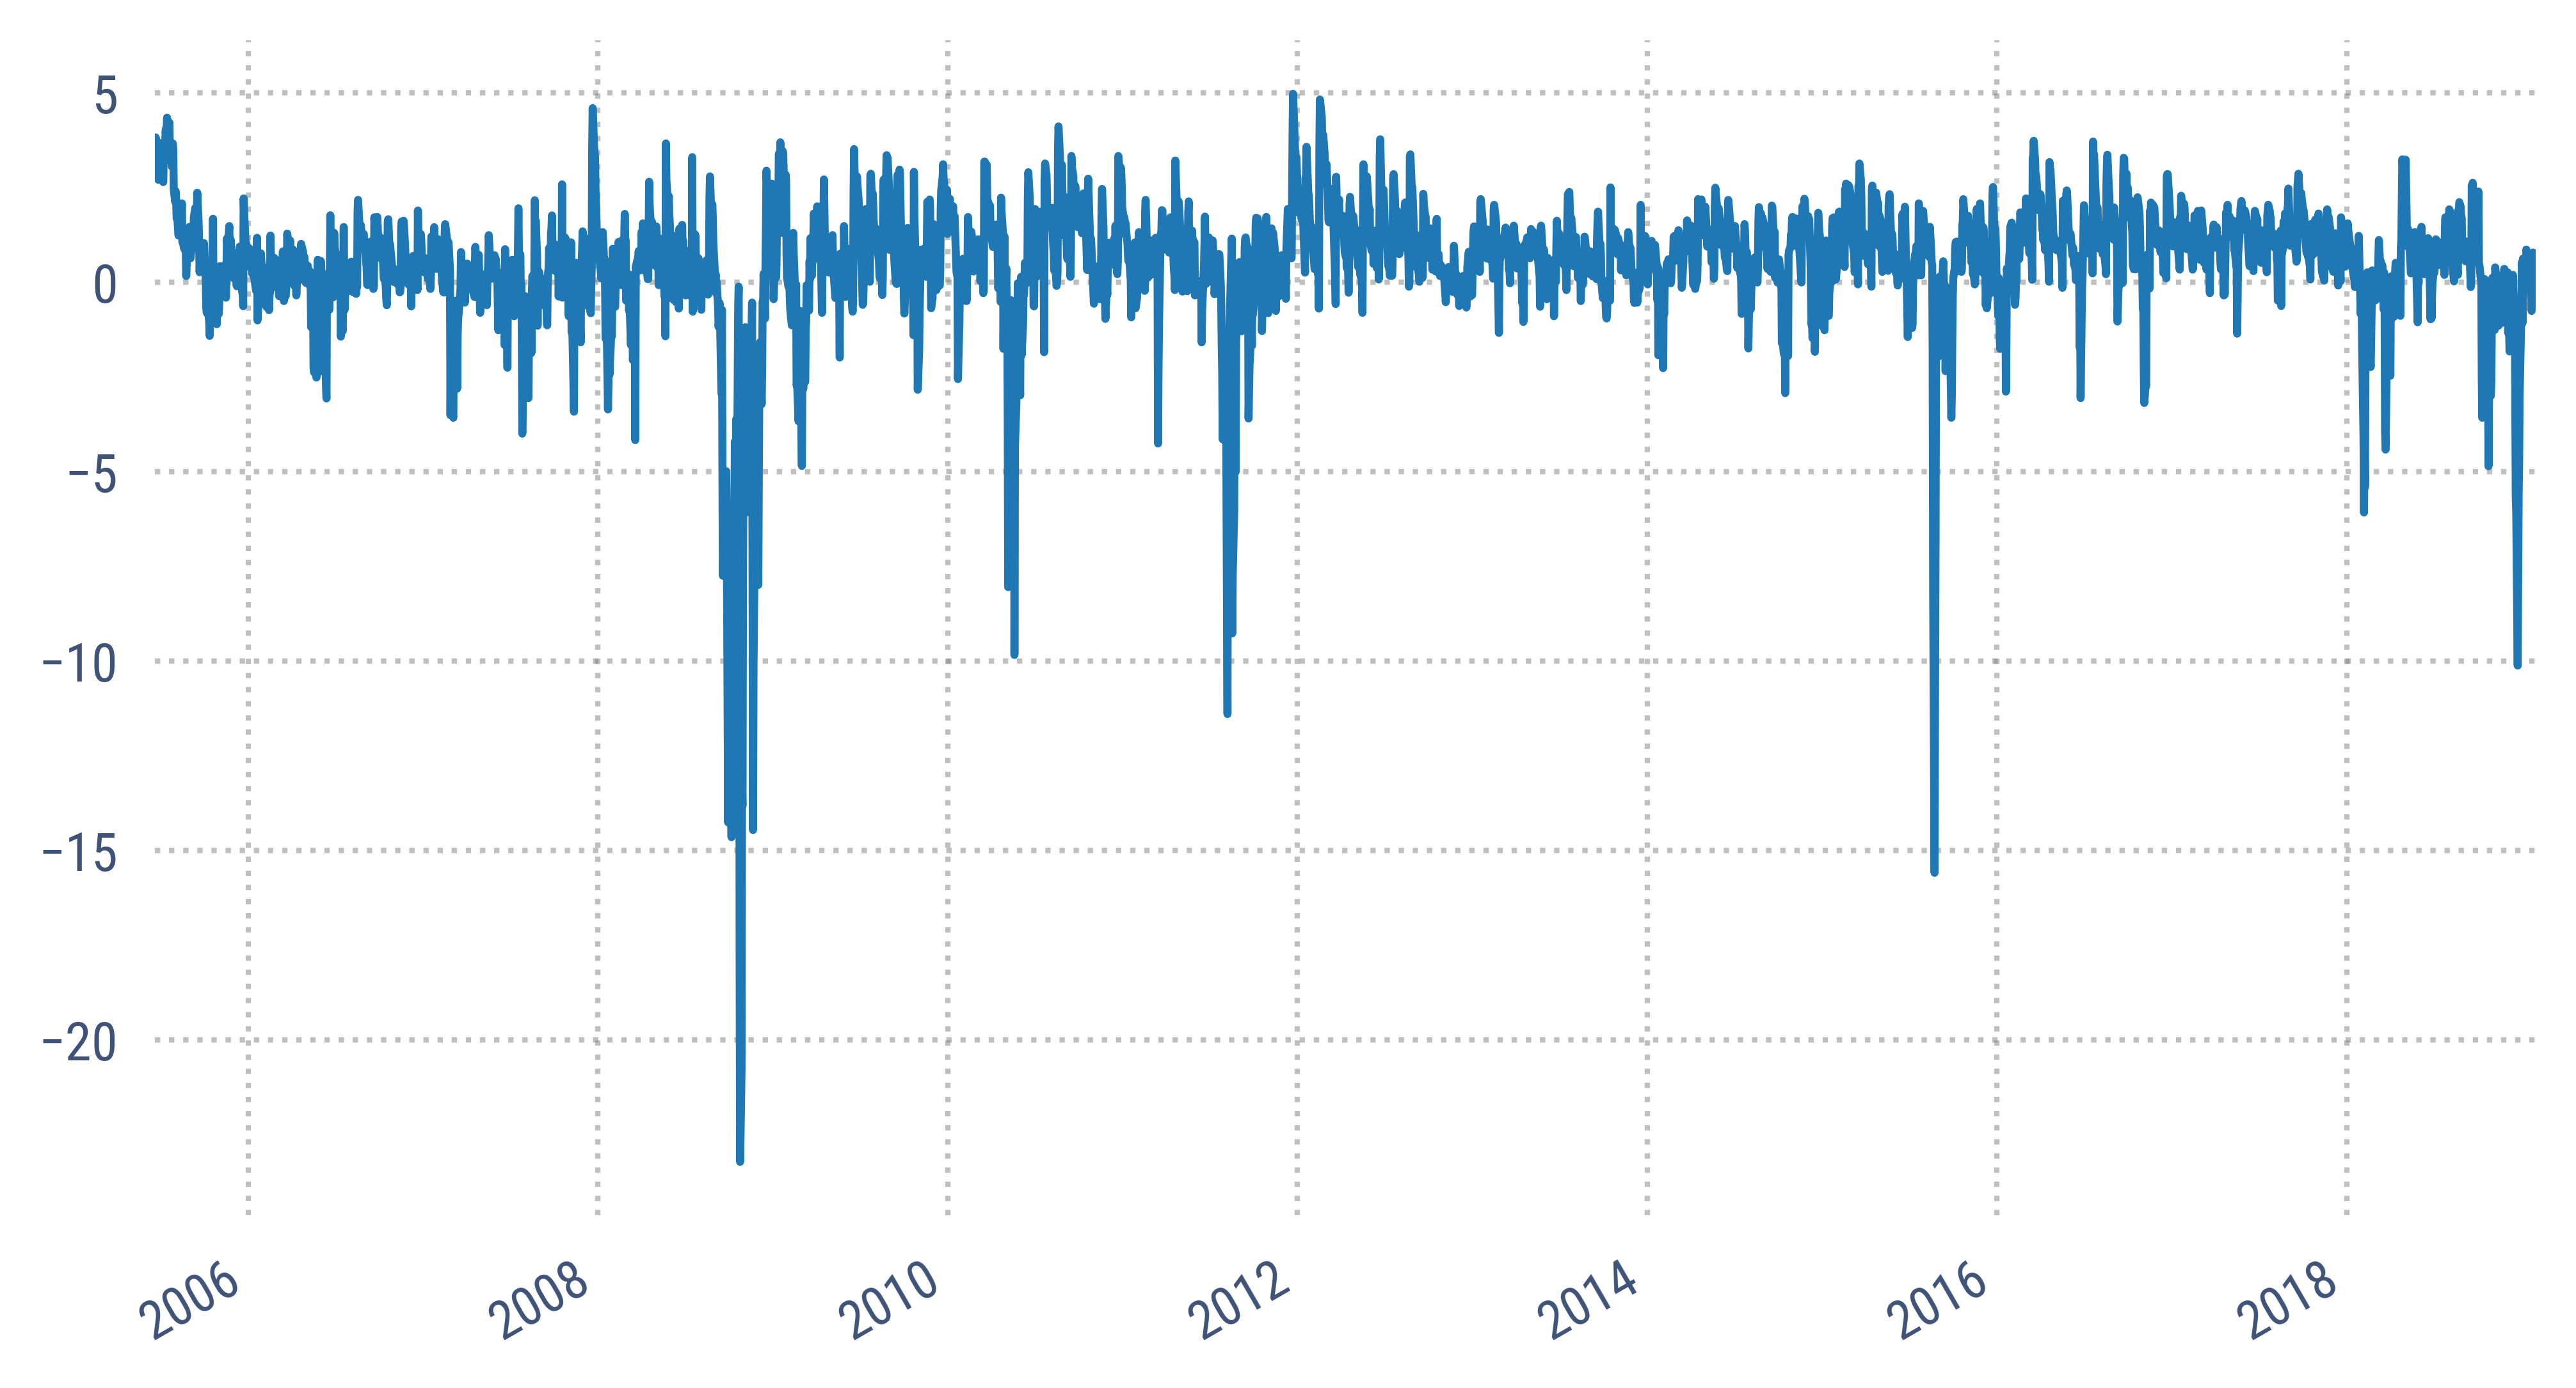

In [20]:
vix_all = pd.concat(vix_list, axis=1)
fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=300, 
                 facecolor='None', 
                edgecolor='None')
ax_vix = vix_all.plot(ax=plt.gca())
plt.autoscale(enable=True, axis='x', tight=True)

fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=300, 
                 facecolor='None', 
                edgecolor='None')

slope = vix_all[vix_all.columns[1]] - vix_all[vix_all.columns[0]]
ax_slope = slope.fillna(0).plot()
plt.autoscale(enable=True, axis='x', tight=True)

fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=300, 
                 facecolor='None', 
                edgecolor='None')
level_premium = vix_all[vix_all.columns[0]] - vix_raw['Adj Close']
ax_level = level_premium.dropna(how='any').plot()
plt.autoscale(enable=True, axis='x', tight=True)

_ = [color_axis(ax, text_color_light) for ax in [ax_vix, ax_slope, ax_level]]
_ = [invisible_spines(ax) for ax in [ax_vix, ax_slope, ax_level]]
_ = grid_xticks_format([ax_vix, ax_slope, ax_level])
